# Data mining \& clustering

The goal if this practical is to adress the folowing problem: 
<center style="color:red" >  Given XXX raw, unlabeled documents, ... How to exploit/understand/represent them?</center>

In the previous week, we have seen how to represent textual data with the Bag of Words (BoW) model:
$$X = 
	\begin{matrix} 
	 & \textbf{t}_j \\
	 & \downarrow \\
	\textbf{d}_i \rightarrow &
	\begin{pmatrix} 
	x_{1,1} & \dots & x_{1,d} \\
	\vdots & \ddots & \vdots \\
	x_{N,1} & \dots & x_{N,d} \\
	\end{pmatrix}
	\end{matrix}
	$$

From this BoW representation, we want to answer the following questions:
1. Which clustering algorithm to choose?
    - K-means, LSA, pLSA, LDA
1. What results to expect?
    - Semantics, noise cleaning, etc...
1. Which qualitative and quantitative analyses to understand the groups?
[comment]: <> (%1. Comment boucler, itérer pour améliorer la qualité du processus?)


<span style="color:magenta" > In this practical, we use a **labeled dataset** in order to evaluate performances with quantitative and well-defined metrics. </span>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path
import sklearn


## Data loading



In [2]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [3]:
# conversion BoW + tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer() 
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)

# sparsity measure = 44 active words over 1000 per document (157 over 130000) !!
print(vectors.nnz / float(vectors.shape[0]))

(11314, 1000)
44.164928407283014


In [4]:
# retrieve words
print([(i,vectorizer.get_feature_names_out()[i]) \
       for i in np.random.randint(vectors.shape[1], size=10)])

[(905, 'title'), (155, 'best'), (361, 'especially'), (96, 'ai'), (644, 'normal'), (344, 'easy'), (373, 'fact'), (770, 'return'), (79, 'able'), (819, 'set')]


In [5]:
# labels (only for evaluation)
Y = newsgroups_train.target
print(Y[:10]) 
print([newsgroups_train.target_names[i] for i in Y[:20]]) # vraie classe

[ 7  4  4  1 14 16 13  3  2  4]
['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'rec.motorcycles', 'talk.religion.misc', 'comp.sys.mac.hardware', 'sci.space', 'misc.forsale', 'alt.atheism', 'comp.graphics', 'rec.autos', 'sci.electronics', 'comp.windows.x']


# 0) Word clouds 
### Drawing word clouds from the raw corpus or words' frequencies :  [make word clouds !](https://github.com/amueller/word_cloud)

### Installation
If you are using pip:

`pip install wordcloud`

### If you are using conda, you can install from the conda-forge channel:

`conda install -c conda-forge wordcloud`

### Let's look at the most frequent words in this dataset

In [6]:
data = np.array(newsgroups_train.data)
corpus = "".join(data)
words = corpus.split() # optional args to choose the splitting chars
print("Nb mots=",len(words))

from collections import Counter

counter = Counter(words)
print(counter.most_common(200))

Nb mots= 3252437
[('the', 127670), ('to', 69836), ('of', 66705), ('a', 56148), ('and', 52580), ('is', 39554), ('in', 37787), ('I', 37616), ('that', 34582), ('>', 27843), ('for', 25707), ('you', 19874), ('it', 19698), ('be', 18364), ('on', 18201), ('have', 17292), ('are', 17260), ('with', 16179), ('not', 15434), ('The', 14079), ('this', 13611), ('as', 13373), ('or', 12497), ('was', 12426), ('Subject:', 11642), ('From:', 11536), ('Lines:', 11328), ('Organization:', 10881), ('by', 10279), ('but', 10265), ('|', 10072), ('from', 9859), ('at', 9807), ('-', 9662), ('they', 9591), ('an', 9393), ('will', 8584), ('can', 8493), ('would', 8381), ('In', 7904), ('if', 7792), ('about', 7768), ('Re:', 7747), ('my', 7679), ('--', 7639), ('writes:', 7505), ('your', 6972), ('has', 6969), ('do', 6930), ('all', 6745), ('one', 6576), ('|>', 6521), ('article', 6402), ('what', 6183), ('we', 6047), ('there', 5798), ('any', 5759), ('who', 5734), ('some', 5682), ('he', 5343), ('which', 5303), ('their', 5178), ('

### Plot the N frequent words and verify that its follows a Zipf law

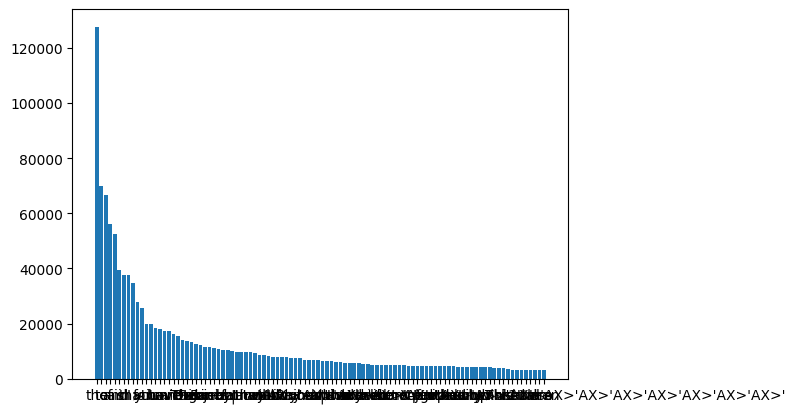

In [7]:
from collections import Counter, OrderedDict

def n_most_freq(N, words):
    counter = Counter(words)
    mc = OrderedDict(counter.most_common(N))
    plt.bar(mc.keys(), mc.values())
    

n_most_freq(100, words)

### Experiment word clouds

In [16]:
import wordcloud as wc
wordcloud = wc.WordCloud(background_color='white', stopwords = [], max_words=100).generate(corpus)            

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')

'import' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


NameError: name 'WordCloud' is not defined

In [17]:
from wordcloud import STOPWORDS # Note: this is the default option           
wordcloud = wc.WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate(corpus) 

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

ModuleNotFoundError: No module named 'wordcloud'

### Use word clouds with generate\_from\_frequencies. 
N.B.: retrieve the most words frequencies using a CountVectorizer

In [ ]:
wordcloud = wc.WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate_from_frequencies(frequencies=freq_dict)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
vectors = vectorizer.fit_transform(words)
names = vectorizer.get_feature_names_out()
freq = vectors.toarray().sum(axis=0)

dict_countvect = dict(zip(names, freq))
mc = OrderedDict(dict_countvect.most_common(100))

wordcloud = wc.WordCloud(background_color='white', stopwords = STOPWORDS, max_words=100).generate_from_frequences(mc) 

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

MemoryError: Unable to allocate 24.2 GiB for an array with shape (3252437, 1000) and data type int64

### Drawing word clouds from classes


# 1) Clustering algorithm: K-Means

**Let's start by the most famous and simple unsupervised algorithm: $k$-means!**
Look at [sklear documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
and apply it to your BoW matrix.


In [27]:
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data)

kmeans = KMeans(n_clusters=20, random_state=0, max_iter=10).fit(vectors)
# Getting clusters:
cc = kmeans.cluster_centers_
print(cc)

#idx = cc[2].tolist().index(max(cc[2])) # index du mot le plus fréquent
#print(vectorizer.get_feature_names_out()[idx]) # mot correspondant

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.00481251, 0.00431009, 0.00048919, ..., 0.00481887, 0.01265084,
        0.00097928],
       [0.00369518, 0.01008388, 0.00139004, ..., 0.01172087, 0.00496925,
        0.00488701],
       [0.00390038, 0.00431445, 0.0023992 , ..., 0.00616613, 0.00405261,
        0.00336554],
       ...,
       [0.00050777, 0.00514748, 0.00089056, ..., 0.00369742, 0.00111354,
        0.        ],
       [0.00836867, 0.0035352 , 0.        , ..., 0.00816881, 0.0031431 ,
        0.01436739],
       [0.0015631 , 0.00515836, 0.00593669, ..., 0.00522794, 0.00822491,
        0.00154939]])

### Clustering Analysis: 
1. **Qualtitative:**
    - Look at the most important words for each cluster
    - Perform cluster assignement to each document, and compute word cloud on the document (raw text or frequencies)
2. **Quantitative:**
    - Compute cluster "purity": $p_j= \frac{|y^*|}{|C_j|}$, where $y^*$ is the most frequent (GT) label in cluster $C$ $\Rightarrow$ $p = \sum\limits_j |C_j| p_j$
    - Compute [Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) and [Adjusted Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) 

In [49]:
for j in range(20):
    purity = 1/1000 * sum([max(cc[j]) for i in range(len(cc))])
    print(purity)

0.00535743142354942
0.0011998670642880203
0.0041372214741386415
0.006615039434860359
0.0025412569713609843
0.002396751640923415
0.0031542930671866025
0.005998052184094985
0.007937358224832816
0.00630520337241141
0.0034724679456351894
0.0029587805521572278
0.0036088550392008763
0.0053273020086190585
0.0011444571254507904
0.005265111482783939
0.004895758226479849
0.005692644757901817
0.00631058007531575
0.006514617326324377


# 2) Latent Semantic Analysis (LSA <=> SVD) 


**Remember the LSA factorziation**: 
$$ 
\begin{matrix} 
 & X  &\!\!\!\!\!=\!\!\!\!\!& U  & \Sigma & V^T \\
  & \textbf{t}_j   &  & \hat{ \textbf{d}_i} & &  \\
 & \downarrow  &  &\downarrow  & & \\
\textbf{d}_i \rightarrow 
&
\begin{pmatrix} 
x_{1,1} & \dots & x_{1,d} \\
\\
\vdots & \ddots & \vdots \\
\\
x_{N,1} & \dots & x_{N,d} \\
\end{pmatrix}
&
\!\!\!\!\!=\!\!\!\!\!
%&
%(\hat{ \textbf{t}_j}) \rightarrow
&
\begin{pmatrix} 
\begin{pmatrix} &  \textbf{u}_1 &  \end{pmatrix} \\
\vdots \\
\begin{pmatrix}  & \textbf{u}_k &  \end{pmatrix}
\end{pmatrix}
%&
%\!\!\!\!\!\cdot\!\!\!\!\!
&
\begin{pmatrix} 
\sigma_1 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & \sigma_k \\
\end{pmatrix}
%&
%\!\!\!\!\!\cdot\!\!\!\!\!
&
\begin{pmatrix} 
\begin{pmatrix} \, \\ \, \\ \textbf{v}_1 \\ \, \\ \,\end{pmatrix} 
\dots
\begin{pmatrix} \, \\ \, \\ \textbf{v}_k \\ \, \\ \, \end{pmatrix}
\end{pmatrix}
\end{matrix}
$$

- Look at [SVD doc in skelarn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)
- Do the same qualitative/quantitative evaluation than with K-Means
- You can also use LSA as a pre-processing step for K-Means, *i.e.* running K-Means on $\boldsymbol{U}$ matrix above
    - N.B. : try without/with $\ell_2$ normalization of $\boldsymbol{U}$'s rows before running  K-Means
    - You can also benefit from LSA pre-processing for using [t-SNE visualization](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (see code below)


In [29]:
# t-SNE from the U matrix computed by LSA
svd = sklearn.decomposition.TruncatedSVD(n_components=vectors.shape[1], n_iter=7, random_state=40)
svd.fit(vectors)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',n_iter=5000, verbose=2)
tsne_mat = tsne.fit_transform(U)

NameError: name 'U' is not defined

In [51]:
NN2cluster = np.argmax(np.abs(vectors_SVD), axis=0)
#import seaborn as sns
import matplotlib.cm as cm
cmap = cm.tab20
cmap = cm.get_cmap('hsv', 20) 
cmap = cm.get_cmap('jet', 20)
#cmap = cm.tab20

plt.figure(figsize=(15,10))
plt.scatter(tsne_mat[:,0],tsne_mat[:,1], c=Y, cmap=cmap, s=10)
plt.scatter(tsne_mat[NN2cluster[:],0],tsne_mat[NN2cluster[:],1], c='black', s=100)
#plt.scatter(tsne_mat[NN2cluster2[:],0],tsne_mat[NN2cluster2[:],1], c='red', s=100)
plt.colorbar(ticks=range(20))

NameError: name 'vectors_SVDn' is not defined

# 3) Latent Dirichlet Allocation (LDA)

Perform the same experiments with LDA:
- LDA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html


**Start with a CountVectorizer**

In [30]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
vectorizer = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize, max_df=0.95, min_df=2, max_features=1000)

vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors.shape)
print(vectors.nnz / float(vectors.shape[0]))



c:\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(11314, 1000)
48.02527841612162


## LDA-viz

In [ ]:
# pip install install pyldavis
from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


pyLDAvis.sklearn.prepare(lda,vectors,vectorizer)

# Performances evaluation

**Compare the different approaches wrt three quantitative metrics.**